In [ ]:
"""
    validate pandas structure if correct for cox
"""

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from lifelines import CoxPHFitter
from lifelines.utils import survival_table_from_events, to_long_format

In [2]:
df = pd.read_parquet("../data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_complete_cases_dash.parquet")

In [3]:
import lifelines
lifelines.__version__

'0.27.7'

In [42]:
test_cols = ["eid", "age.1.0", 
 "sex",
 "bhs_score.0.0",
 "bhs_score.1.0", 
 "delta_bhs",
 "delta_biomarker_bhs",
 "age.0.0", 
 "smoking_status.0.0",
 "alcohol.0.0",
 "BMI.0.0",
 "number_medications.0.0"]

In [44]:
df[test_cols].head()

,eid,age.1.0,sex,bhs_score.0.0,bhs_score.1.0,delta_bhs,delta_biomarker_bhs,age.0.0,smoking_status.0.0,alcohol.0.0,BMI.0.0,number_medications.0.0
0,1001043,51.0,Female,0.166667,0.000000,-0.166667,0.150000,46.0,Never,Three or four times a week,23.2735,1.0
1,1001786,60.0,Female,0.133333,0.333333,0.200000,0.316667,54.0,Previous,One to three times a month,27.1581,4.0
2,1002061,74.0,Male,0.166667,0.166667,0.000000,0.316667,68.0,Never,Daily or almost daily,24.3126,2.0
3,1002553,60.0,Female,0.100000,0.150000,0.050000,0.166667,55.0,Never,Once or twice a week,23.7388,1.0
4,1002908,57.0,Male,0.383333,0.550000,0.166667,0.500000,54.0,Never,Daily or almost daily,31.8773,6.0


In [45]:
df[test_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   eid                     6962 non-null   int32   
 1   age.1.0                 6962 non-null   float64 
 2   sex                     6962 non-null   object  
 3   bhs_score.0.0           6962 non-null   float64 
 4   bhs_score.1.0           6962 non-null   float64 
 5   delta_bhs               6962 non-null   float64 
 6   delta_biomarker_bhs     6962 non-null   float64 
 7   age.0.0                 6962 non-null   float64 
 8   smoking_status.0.0      6962 non-null   category
 9   alcohol.0.0             6962 non-null   object  
 10  BMI.0.0                 6948 non-null   float64 
 11  number_medications.0.0  6962 non-null   float64 
dtypes: category(1), float64(8), int32(1), object(2)
memory usage: 578.2+ KB


In [48]:
df[test_cols].astype({"age.1.0": "uint32", 
 "sex": "category",
 "bhs_score.0.0" :"float64",
 "bhs_score.1.0": "float64", 
 "delta_bhs": "float64",
 "delta_biomarker_bhs": "float64",
 "age.0.0": "uint32", 
 "smoking_status.0.0": "category",
 "alcohol.0.0": "category",
 "BMI.0.0": "category",
 "number_medications.0.0": "uint16"}).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   eid                     6962 non-null   int32   
 1   age.1.0                 6962 non-null   uint32  
 2   sex                     6962 non-null   category
 3   bhs_score.0.0           6962 non-null   float64 
 4   bhs_score.1.0           6962 non-null   float64 
 5   delta_bhs               6962 non-null   float64 
 6   delta_biomarker_bhs     6962 non-null   float64 
 7   age.0.0                 6962 non-null   uint32  
 8   smoking_status.0.0      6962 non-null   category
 9   alcohol.0.0             6962 non-null   category
 10  BMI.0.0                 6948 non-null   category
 11  number_medications.0.0  6962 non-null   uint16  
dtypes: category(4), float64(4), int32(1), uint16(1), uint32(2)
memory usage: 518.2 KB


In [11]:
longTestDf = to_long_format(df[test_cols], "ttdCancer")

In [18]:
longTestDf.dropna()

,eid,delta_bhs,age.0.0,sex,number_medications.0.0,age.1.0,caseCancer,start,stop
3,1002553,0.050000,55.0,Female,1.0,60.0,1.0,0,1719.0
7,1003857,0.100000,61.0,Male,0.0,66.0,1.0,0,906.0
11,1006331,-0.166667,52.0,Male,0.0,55.0,1.0,0,1410.0
20,1011059,-0.050000,69.0,Male,2.0,73.0,1.0,0,3373.0
21,1011643,0.116667,52.0,Female,6.0,56.0,1.0,0,2028.0
...,...,...,...,...,...,...,...,...,...
6932,6001074,0.000000,63.0,Male,7.0,68.0,1.0,0,1584.0
6942,6010549,-0.183333,60.0,Male,2.0,66.0,1.0,0,4684.0
6944,6014193,-0.066667,58.0,Male,0.0,63.0,1.0,0,4642.0
6948,6016608,-0.100000,49.0,Male,0.0,54.0,1.0,0,613.0


In [19]:
survival_table_from_events(death_times=longTestDf.dropna()["stop"],
                          event_observed=longTestDf.dropna()["caseCancer"])

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1501,1501
1.0,1,1,0,0,1501
3.0,1,1,0,0,1500
7.0,1,1,0,0,1499
11.0,1,1,0,0,1498
...,...,...,...,...,...
4880.0,1,1,0,0,5
4909.0,1,1,0,0,4
4910.0,1,1,0,0,3


In [6]:
df[test_cols].dropna().head()

,eid,delta_bhs,age.0.0,sex,number_medications.0.0,age.1.0,ttdCancer,caseCancer
3,1002553,0.050000,55.0,Female,1.0,60.0,1719.0,1.0
7,1003857,0.100000,61.0,Male,0.0,66.0,906.0,1.0
11,1006331,-0.166667,52.0,Male,0.0,55.0,1410.0,1.0
20,1011059,-0.050000,69.0,Male,2.0,73.0,3373.0,1.0
21,1011643,0.116667,52.0,Female,6.0,56.0,2028.0,1.0


<lifelines.CoxPHFitter: fitted with 1501 total observations, 0 right-censored observations>
             duration col = 'ttdCancer'
                event col = 'caseCancer'
      baseline estimation = breslow
   number of observations = 1501
number of events observed = 1501
   partial log-likelihood = -9477.25
         time fit was run = 2024-02-22 14:25:41 UTC
                    model = complete_cases

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
delta_bhs     0.35       1.42       0.17             0.01             0.69                 1.01                 1.99
age.0.0       0.01       1.01       0.00            -0.00             0.01                 1.00                 1.01
sex[T.Male]  -0.09       0.92       0.05            -0.19             0.01                 0.83                 1.01

              cmp to     z    p   -log2(p)
covariate                                 
delta_bhs       0.00  2.02 0.04       4.52
age.0.0         0.00  1.43 0.15       2.70
sex[T.Male]     0.00 -1.70 0.09       3.50
---
Concordance = 0.53
Partial AIC = 18960.50
log-likelihood ratio test = 8.94 on 3 df
-log2(p) of ll-ratio test = 5.05


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1501 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                  test_statistic    p  -log2(p)
age.0.0     km              0.00 0.96      0.05
            rank            0.00 0.96      0.05
delta_bhs   km              2.97 0.08      3.56
            rank            2.98 0.08      3.56
sex[T.Male] km              5.86 0.02      6.02
            rank            5.87 0.02      6.02



1. Variable 'sex[T.Male]' failed the non-proportional test: p-value is 0.0154.

   Advice: with so few unique values (only 2), you can include `strata=['sex[T.Male]', ...]` in the
call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<Axes: xlabel='rank-transformed time\n(p=0.0845)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0846)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9627)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9633)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0154)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0155)'>]]

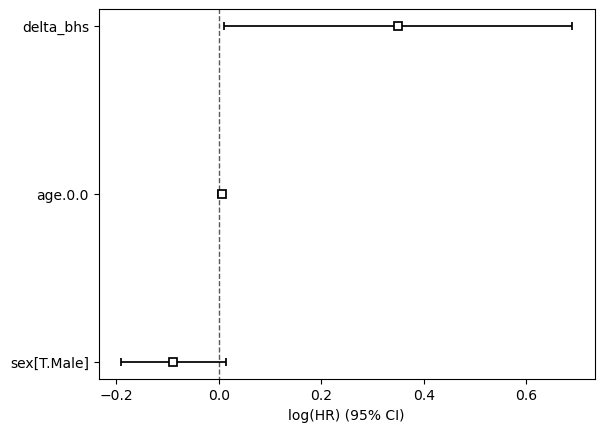

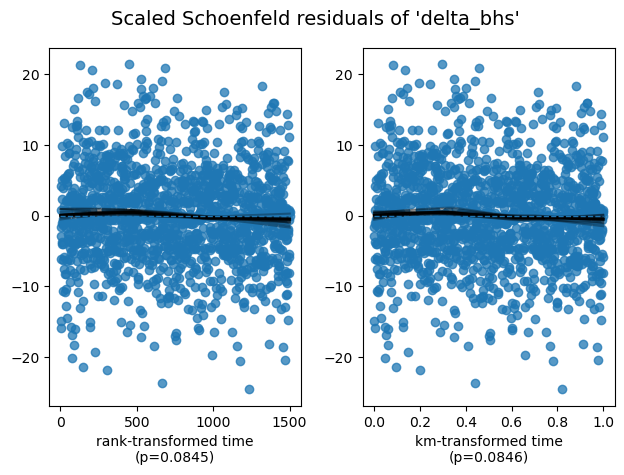

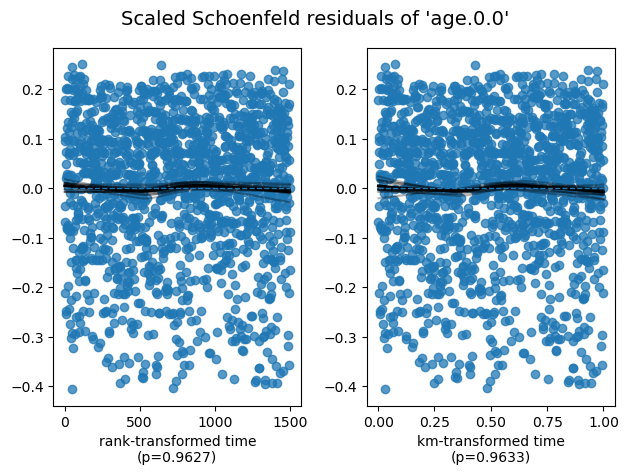

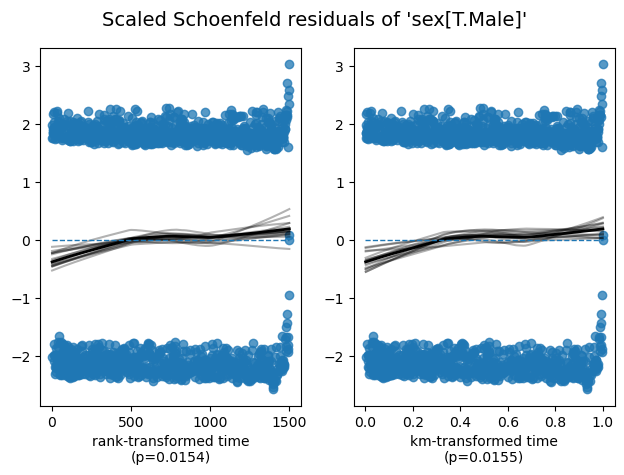

In [24]:
cph = CoxPHFitter()
cph.fit(df[test_cols].dropna(), duration_col='ttdCancer', event_col='caseCancer', formula="delta_bhs + age.0.0 + sex")

cph.print_summary(model="complete_cases")  
cph.plot()
cph.check_assumptions(df[test_cols].dropna(), p_value_threshold=0.05, show_plots=True)

In [21]:
def getSurvivalsList(row, timeEvent):
    if pd.isnull(row[timeEvent]):
        return [row["age.0.0"], row["age.1.0"]]
    else:
        return [row["age.0.0"], row["age.1.0"], row["age.0.0"] + row[timeEvent]/365]

def getSurvivalDf(df, columns, timeEvent, outcome):
    survivalDf = df[columns].copy()
    survivalDf.loc[:,"timepoints"] = survivalDf.apply(getSurvivalsList, timeEvent=timeEvent, axis=1)
    survivalDf.loc[:, "ageEvent"] = survivalDf["age.0.0"] + survivalDf[timeEvent]/365
    survivalDf = survivalDf.explode("timepoints")
    survivalDf[outcome] = np.where(survivalDf["timepoints"] >= survivalDf["ageEvent"], 1, 0)
    survivalDf = survivalDf.drop(columns=[timeEvent])
    
    return survivalDf

In [22]:
# make sure function works
print(
    df[test_cols].apply(getSurvivalsList, timeEvent="ttdCancer", axis=1) # getList of all timepoints for individual
)
print(
    df[test_cols]["age.0.0"] + df[test_cols]["ttdCancer"]/365 # then get age of Event (if aplicable)
)
print (
    df[test_cols].apply(getSurvivalsList, timeEvent="ttdCancer", axis=1).explode() # timepoint list break into each col
)
print(
    df["age.0.0"] >= df[test_cols]["age.0.0"] + df[test_cols]["ttdCancer"]/365 # label no event prior to cancer dx
)
print(
    df[test_cols]["age.0.0"] + df[test_cols]["ttdCancer"]/365 >= df[test_cols]["age.0.0"] + df[test_cols]["ttdCancer"]/365
    # label 1 for event time
)
print(
    df[test_cols]["age.0.0"] >= np.nan
    # label 0 for disease free individual
)

0                          [46.0, 51.0]
1                          [54.0, 60.0]
2                          [68.0, 74.0]
3       [55.0, 60.0, 59.70958904109589]
4                          [54.0, 57.0]
                     ...               
6957                       [46.0, 50.0]
6958                       [57.0, 61.0]
6959                       [58.0, 62.0]
6960                       [55.0, 59.0]
6961    [41.0, 46.0, 51.68767123287671]
Length: 6962, dtype: object
0             NaN
1             NaN
2             NaN
3       59.709589
4             NaN
          ...    
6957          NaN
6958          NaN
6959          NaN
6960          NaN
6961    51.687671
Length: 6962, dtype: float64
0            46.0
0            51.0
1            54.0
1            60.0
2            68.0
          ...    
6960         55.0
6960         59.0
6961         41.0
6961         46.0
6961    51.687671
Length: 15425, dtype: object
0       False
1       False
2       False
3       False
4       False
        

In [23]:
getSurvivalDf(df, test_cols, "ttdCancer", "caseCancer")

,eid,delta_bhs,age.0.0,sex,number_medications.0.0,age.1.0,caseCancer,timepoints,ageEvent
0,1001043,-0.166667,46.0,Female,1.0,51.0,0,46.0,NaN
0,1001043,-0.166667,46.0,Female,1.0,51.0,0,51.0,NaN
1,1001786,0.200000,54.0,Female,4.0,60.0,0,54.0,NaN
1,1001786,0.200000,54.0,Female,4.0,60.0,0,60.0,NaN
2,1002061,0.000000,68.0,Male,2.0,74.0,0,68.0,NaN
...,...,...,...,...,...,...,...,...,...
6960,6024466,-0.033333,55.0,Male,0.0,59.0,0,55.0,NaN
6960,6024466,-0.033333,55.0,Male,0.0,59.0,0,59.0,NaN
6961,6024672,0.150000,41.0,Male,1.0,46.0,0,41.0,51.687671
6961,6024672,0.150000,41.0,Male,1.0,46.0,0,46.0,51.687671


<lifelines.CoxPHFitter: fitted with 15425 total observations, 13506 right-censored observations>
             duration col = 'timepoints'
                event col = 'caseCancer'
      baseline estimation = breslow
   number of observations = 15425
number of events observed = 1919
   partial log-likelihood = -14896.00
         time fit was run = 2024-02-26 13:49:28 UTC
                    model = get_all_timepoints_df

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
delta_bhs   0.38       1.47       0.16             0.08             0.69                 1.08                 1.99

            cmp to    z    p   -log2(p)
covariate                              
delta_bhs     0.00 2.46 0.01       6.18
---
Concordance = 0.50
Partial AIC = 29794.01
log-likelihood ratio test = 6.07 on 1 df
-log2(p) of ll-ratio test = 6.19


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 15425 total observations, 13506 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic      p  -log2(p)
delta_bhs km             14.07 <0.005     12.47
          rank           12.98 <0.005     11.64



1. Variable 'delta_bhs' failed the non-proportional test: p-value is 0.0002.

   Advice 1: the functional form of the variable 'delta_bhs' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'delta_bhs' using pd.cut, and then specify it in
`strata=['delta_bhs', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.h

[[<Axes: xlabel='rank-transformed time\n(p=0.0003)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0002)'>]]

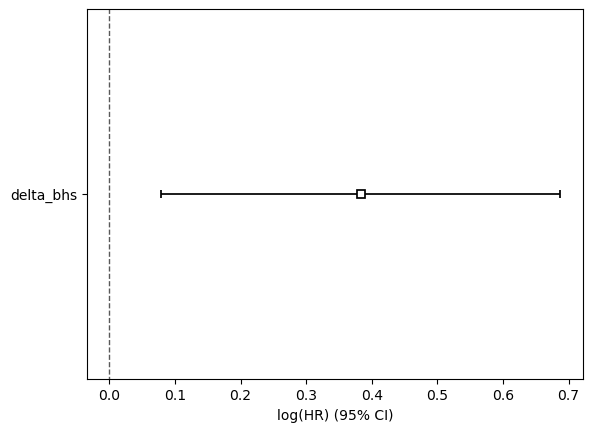

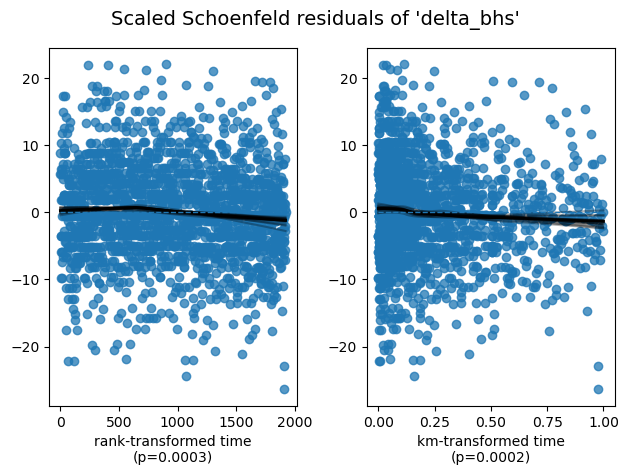

In [31]:
testDf = getSurvivalDf(df, test_cols, "ttdCancer", "caseCancer")
cph = CoxPHFitter()
cph.fit(testDf, duration_col='timepoints', event_col='caseCancer', formula="delta_bhs")

cph.print_summary(model="get_all_timepoints_df")  
cph.plot()
cph.check_assumptions(testDf.reset_index(), p_value_threshold=0.05, show_plots=True)

In [39]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15425 entries, 0 to 6961
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   eid                     15425 non-null  int32  
 1   delta_bhs               15425 non-null  float64
 2   age.0.0                 15425 non-null  float64
 3   sex                     15425 non-null  object 
 4   number_medications.0.0  15425 non-null  float64
 5   age.1.0                 15425 non-null  float64
 6   caseCancer              15425 non-null  int64  
 7   timepoints              15425 non-null  object 
 8   ageEvent                4503 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 1.6+ MB


In [30]:
survival_table_from_events(testDf["timepoints"], testDf["caseCancer"], collapse=True)

,removed,observed,censored,at_risk
event_at,,,,
"(-0.001, 1.888]",0,0,0,15425
"(1.888, 3.775]",0,0,0,15425
"(3.775, 5.663]",0,0,0,15425
"(5.663, 7.55]",0,0,0,15425
"(7.55, 9.438]",0,0,0,15425
"(9.438, 11.326]",0,0,0,15425
"(11.326, 13.213]",0,0,0,15425
"(13.213, 15.101]",0,0,0,15425
"(15.101, 16.988]",0,0,0,15425


model,lifelines.CoxPHFitter
duration col,'timepoints'
event col,'caseCancer'
cluster col,'eid'
robust variance,True
strata,sex
baseline estimation,breslow
number of observations,15425
number of events observed,1919
partial log-likelihood,-11134.01
time fit was run,2024-02-22 15:15:18 UTC



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 15425 total observations, 13506 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic      p  -log2(p)
age.0.0                km             34.85 <0.005     28.06
                       rank           29.71 <0.005     24.25
delta_bhs              km              2.92   0.09      3.52
                       rank            1.10   0.29      1.77
number_medications.0.0 km              0.20   0.65      0.62
                       rank            0.00   0.98      0.03



1. Variable 'age.0.0' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'age.0.0' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age.0.0' using pd.cut, and then specify it in
`strata=['age.0.0', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_

<Axes: >

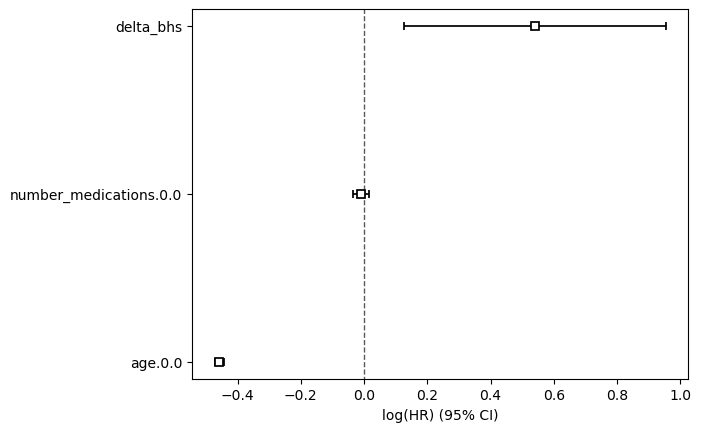

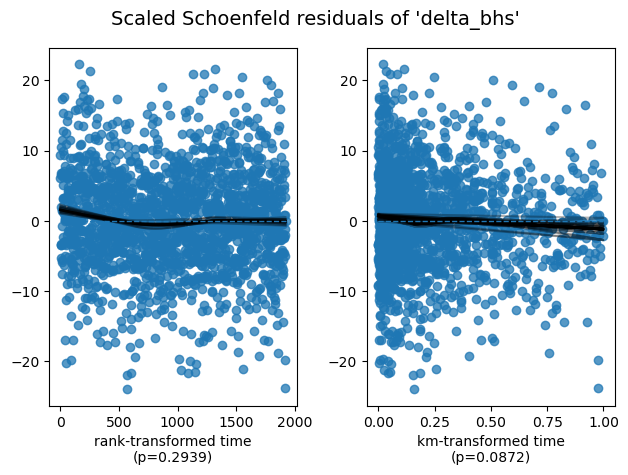

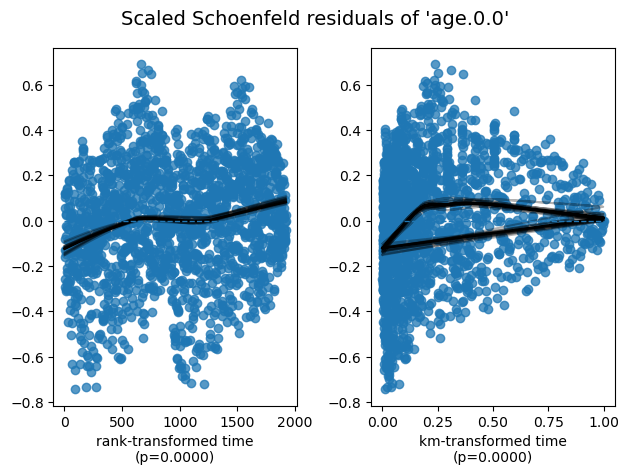

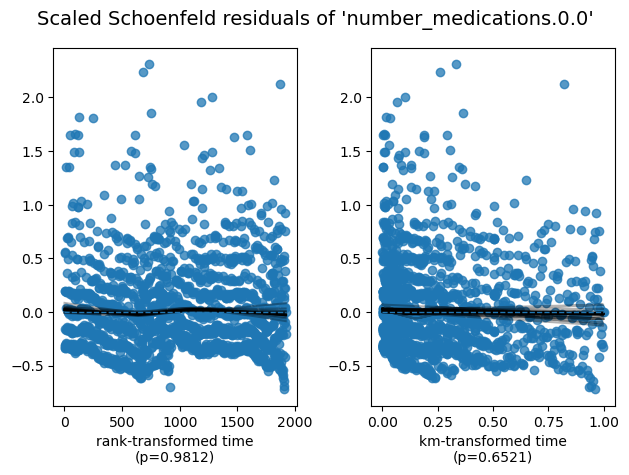

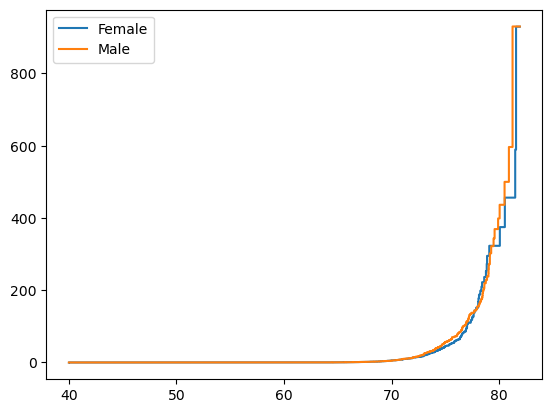

In [57]:
cph = CoxPHFitter()
cph.fit(testDf, duration_col='timepoints', 
        cluster_col='eid', strata=['sex'],
        event_col='caseCancer', formula="delta_bhs + age.0.0 + number_medications.0.0")

cph.print_summary(model="all_timepoints_strata_sex")  
cph.plot()
cph.check_assumptions(testDf.reset_index(), p_value_threshold=0.05, show_plots=True)
cph.baseline_cumulative_hazard_.plot(drawstyle="steps")

<Axes: >

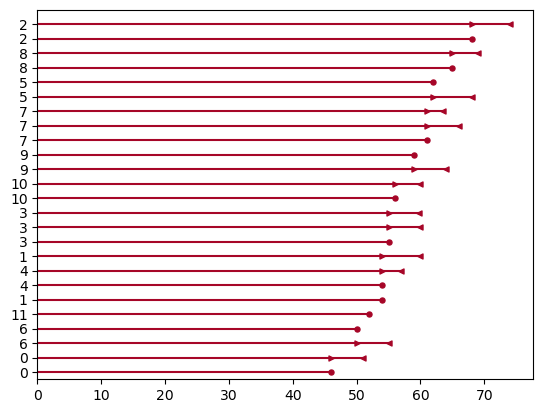

In [22]:
from lifelines.plotting import plot_interval_censored_lifetimes

plot_interval_censored_lifetimes(testDf['age.0.0'].head(25), 
                                 testDf['timepoints'].head(25),
                                event_right_censored_color="#87ceeb")

In [54]:
def getPrettyCoxSummary(df, duration_col, event_col, strata=None, formula=None):
    
    cph = CoxPHFitter()
    cph.fit(df, duration_col=duration_col, event_col=event_col, 
            strata=strata, cluster_col='eid', formula=formula)
    outDf = np.exp(cph.confidence_intervals_)
    outDf["coefficient"] = cph.hazard_ratios_
    outDf = outDf[["coefficient", "95% lower-bound", "95% upper-bound"]]
    
    return outDf

In [51]:
testDf.head()

,eid,delta_bhs,age.0.0,sex,number_medications.0.0,age.1.0,caseCancer,timepoints,ageEvent
0,1001043,-0.166667,46.0,Female,1.0,51.0,0,46.0,NaN
0,1001043,-0.166667,46.0,Female,1.0,51.0,0,51.0,NaN
1,1001786,0.200000,54.0,Female,4.0,60.0,0,54.0,NaN
1,1001786,0.200000,54.0,Female,4.0,60.0,0,60.0,NaN
2,1002061,0.000000,68.0,Male,2.0,74.0,0,68.0,NaN


In [52]:
testDf.shape

(15425, 9)

In [58]:
getPrettyCoxSummary(testDf, "timepoints", "caseCancer", ["sex"], "delta_bhs + age.0.0 + number_medications.0.0")

,coefficient,95% lower-bound,95% upper-bound
covariate,,,
delta_bhs,1.714894,1.133891,2.593602
age.0.0,0.632456,0.623350,0.641695
number_medications.0.0,0.990648,0.966724,1.015165


In [61]:
def getOnlyScoreHazardRatios(prettyCoxDf, bhsType, outcomeType, adjustmentType):
    
    outDf = prettyCoxDf[prettyCoxDf.index == bhsType]
    outDf.insert(0, "outcome_type", outcomeType)
    outDf.insert(1, "adjustment", adjustmentType)    
    
    return outDf

In [64]:
getOnlyScoreHazardRatios(
    getPrettyCoxSummary(testDf, "timepoints", "caseCancer", ["sex"], "delta_bhs + age.0.0 + number_medications.0.0"),
    bhsType="delta_bhs",
    outcomeType="cancer",
    adjustmentType="test")

,outcome_type,adjustment,coefficient,95% lower-bound,95% upper-bound
covariate,,,,,
delta_bhs,cancer,test,1.714894,1.133891,2.593602


In [46]:
testDf[["eid", "timepoints", "caseCancer"]].dropna()

,eid,timepoints,caseCancer
0,1001043,46.0,0
0,1001043,51.0,0
1,1001786,54.0,0
1,1001786,60.0,0
2,1002061,68.0,0
...,...,...,...
6960,6024466,55.0,0
6960,6024466,59.0,0
6961,6024672,41.0,0
6961,6024672,46.0,0


In [91]:
    varList = ["age.0.0", "qual_factor",
            "smoking_status.0.0", "alcohol.0.0", "BMI.0.0",
            "number_medications.0.0"]

In [92]:
for varLength in range(0,7):
    print(varLength)
    print(varList[:varLength])
    

0
[]
1
['age.0.0']
2
['age.0.0', 'qual_factor']
3
['age.0.0', 'qual_factor', 'smoking_status.0.0']
4
['age.0.0', 'qual_factor', 'smoking_status.0.0', 'alcohol.0.0']
5
['age.0.0', 'qual_factor', 'smoking_status.0.0', 'alcohol.0.0', 'BMI.0.0']
6
['age.0.0', 'qual_factor', 'smoking_status.0.0', 'alcohol.0.0', 'BMI.0.0', 'number_medications.0.0']


In [ ]:
for outcome in ["delta_bhs", "delta_biomarker_bhs"]:
    for varLength in range(2, 8): # add more variables 
        _tempDf = getPrettyCoxSummary(
            pd.get_dummies(maleOutcomeDf[varList[0:varLength]+ [outcome]].dropna(),
            columns= maleOutcomeDf[varList[0:varLength]+[outcome]].columns[~maleOutcomeDf[varList[0:varLength]+ [outcome]].columns.str.contains(numericCols)].to_list())
            , "timepoints", "caseCancer")
        _tempDf = getOnlyScoreHazardRatios(_tempDf, outcome, "cancer", adjustmentType = adjustmentTypeList[varLength-2])
        cancerResultList.append(_tempDf)

In [ ]:
getOnlyScoreHazardRatios(
    getPrettyCoxSummary(testDf, "timepoints", "caseCancer", ["sex"], "delta_bhs + age.0.0 + number_medications.0.0"),
    bhsType="delta_bhs",  # vary the bhstype
    outcomeType="cancer", # vary this outcome
    adjustmentType="test") # use below to reflect progressive adjustment type

# remove pd.dummies
# now add progressive adjustment 
# 


In [73]:
'delta_bhs + ' + ' + '.join(varList[2:8])

'delta_bhs + qual_factor + smoking_status.0.0 + alcohol.0.0 + BMI.0.0 + number_medications.0.0'

In [88]:
for varLength in range(0, 6):
    print(varLength)
    print(' + '.join(['delta_bhs'] + varList[0:varLength]))

0
delta_bhs
1
delta_bhs + qual_factor
2
delta_bhs + qual_factor + smoking_status.0.0
3
delta_bhs + qual_factor + smoking_status.0.0 + alcohol.0.0
4
delta_bhs + qual_factor + smoking_status.0.0 + alcohol.0.0 + BMI.0.0
5
delta_bhs + qual_factor + smoking_status.0.0 + alcohol.0.0 + BMI.0.0 + number_medications.0.0


In [1]:
adjustmentLabelList = ["Age", "Education", "Smoking", "Alcohol", "BMI", "Medications"]


In [ ]:
for outcome in ["delta_bhs", "delta_biomarker_bhs"]:
    for varLength in range(2, 8):
        _tempDf = getOnlyScoreHazardRatios(
            getPrettyCoxSummary(testDf, "timepoints", "caseCancer", ["sex"], "delta_bhs + age.0.0 + number_medications.0.0"),
    bhsType="delta_bhs",  # vary the bhstype
    outcomeType="cancer", # vary this outcome
    adjustmentType="test")
        cancerResultList.append(_tempDf)

In [86]:
for varLength in range(0, 6):
    print(varLength)
    print(" + ".join(adjustmentLabelList[0:varLength]))

0

1
Age
2
Age + Education
3
Age + Education + Smoking
4
Age + Education + Smoking + Alcohol
5
Age + Education + Smoking + Alcohol + BMI


In [35]:
" ".join(["delta_bhs"] + adjustmentLabelList[0:0])

'delta_bhs'

In [3]:
for n in range(0, 7):
    print(adjustmentLabelList[0:n])

[]
['Age']
['Age', 'Education']
['Age', 'Education', 'Smoking']
['Age', 'Education', 'Smoking', 'Alcohol']
['Age', 'Education', 'Smoking', 'Alcohol', 'BMI']
['Age', 'Education', 'Smoking', 'Alcohol', 'BMI', 'Medications']
